<a href="https://colab.research.google.com/github/Tomato-in-Japan/Subject_Fri1/blob/Homeworks/%E3%83%87%E3%83%BC%E3%82%BF%E3%82%B5%E3%82%A4%E3%82%A8%E3%83%B3%E3%82%B9%E5%85%A5%E9%96%80_%EF%BC%98%E5%9B%9E%E7%9B%AE_%E3%83%AF%E3%83%BC%E3%82%AF%E3%82%B7%E3%83%BC%E3%83%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 学習目標
　データサイエンスでは多量なデータを操作して統計処理や機械学習による何らかの手法を用いて分析を行います。前回は重回帰のモデルを構築して分析を行いました。今回は、データの扱い方に焦点を当てた分析の手法を学びます。

　機械学習による分析の際には、モデルに学習させるデータと性能を検証するためのデータに分けます。前回はデータのすべてを学習させるデータとして扱いました。今回は学習に使わないデータ、つまり機械に学ばせていない・機械にとって未知のデータを使って性能を評価する手法について学びます。ここではデータを学習用と検証用に分割します。分割はライブラリとして提供されていますので、本ワークシートでは、ライブラリを活用して学習用・検証用データによる重回帰分析ができるようになることを目標とします。また、データの各項目がとりうる値は大きさがまちまちで相互のデータの比較は難しくなります。そこで、標準化する方法も学びます。

　今回の実習は例題はなく、課題のみから構成されます。重回帰の理論については講義ビデオ（７，８回目共通）を見て学んでください。ライブラリの活用については使用するメソッド名などのキーワードを提示しますので、ネット上には解説記事が多数ありますので検索して各自調べながら取り組んでください。

# 1. 導入

## 1-1. 概要

　前回同様に健康に関わるデータから重回帰による分析を試みます。
データの項目は「体重」と「摂取したカロリー」と「お酒を飲んだ量」とします。
このデータから、「ある日の体重」は「前の日の体重」「摂取したカロリー」「お酒を飲んだ量」から求められると仮定して重回帰のモデルを構築して性能を評価します。

## 1-2. ライブラリのインポート

分析に必要なライブラリをインポートします。
必要なライブラリは「データの読込・操作を行うライブラリ」「重回帰のライブラリ」です。

 - データの読込・操作を行うライブラリ：Pandas, Numpy
 - データを分割するライブラリ：Scikit-learnのtrain\_test\_split
 - 重回帰のライブラリ：Scikit-learnのLinearRegression

インポートは下記のコード（授業配布時はコピペ防止の画像にします）

```python
# データの加工・処理・分析ライブラリ
import numpy as np
import pandas as pd

# データを学習用と検証用に分割する
from sklearn.model_selection import train_test_split

# データを標準化するライブラリ
from sklearn import preprocessing

# 重回帰のライブラリ
from sklearn.linear_model import LinearRegression
```

In [ ]:
# このセルにライブラリのインポートを記述して実行
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

# 2. データ

　今回使うデータはポータルからファイルを配布しています。扱うデータは前回と同じものとします。
ファイル名は「health_data.csv」です。

　まずは、csvファイルを読み込んでデータを操作できるようにしましょう。
データを操作できるようにするには、csvファイルを pandas の DaraFrame として読み込みます。読み込み方法はこれまでの授業で扱っていますので必要に応じて動画やワークシートを参照してください。

　データの項目は、前述の通りに、前日の体重、摂取カロリー、飲酒量、体重です。
csvファイルのカラム名は「前日の体重」から順番に previous, calory, drinking, weight です。

In [ ]:
# CSVデータを pandas の DataFrame オブジェクト df として読み込み
df = pd.read_csv('health_data.csv')

     previous  calory  drinking  weight
0          48    2000       300      50
1          50    1600         0      52
2          52    1400       100      51
3          51    2500       600      52
4          50    2200         0      53
..        ...     ...       ...     ...
104        52    1689       550      52
105        52    1307         0      52
106        52    1206         0      51
107        51    1525         0      51
108        51    1464         0      51

[109 rows x 4 columns]


まずは df の中身を確認してみましょう。以下のセルにdfの中身を表示するプログラムを記述して実行して下さい。

## 2-1 データを表示

In [ ]:
# df を表示
print(df)

     previous  calory  drinking  weight
0          48    2000       300      50
1          50    1600         0      52
2          52    1400       100      51
3          51    2500       600      52
4          50    2200         0      53
..        ...     ...       ...     ...
104        52    1689       550      52
105        52    1307         0      52
106        52    1206         0      51
107        51    1525         0      51
108        51    1464         0      51

[109 rows x 4 columns]


実行すると「109 rows × 4 columns」が末尾にあることを確認します。確認できればOKです。これで109行、4列のデータであることが分かります。
それぞれの列が前日の体重（previous）、摂取カロリー（calory）、飲酒量（drinking）、体重（weight）と対応しています。
日毎の各項目の値を表しており、109日分のデータが入っていることがわかります。

## 2-2 説明変数・目的変数の設定

今回、ある日の体重を、「前の日の体重」と「摂取したカロリー」と「お酒を飲んだ量」から求められると仮定して重回帰による分析を試みます。

具体的な重回帰のモデル式は下記を想定します。
$$
y_{体重} = \beta_0 + \beta_{前日の体重} x_{前日の体重} + \beta_{摂取カロリー} x_{摂取カロリー} + \beta_{飲酒量} x_{飲酒量}
$$

説明変数は下記となります
 - 「前の日の体重」　previous
 - 「摂取したカロリー」　calory
 - 「お酒を飲んだ量」　drinking

目的変数は下記となります
 - 「体重」　weight

読み込んだデータを操作して説明変数と目的変数を設定するプログラムを記述して実行してください。ここでプログラム上の説明変数の変数名は x 、目的変数の変数名は y とします。

In [ ]:
x = df
x = df.drop('weight',axis=1)
y=df['weight'].values
print(x)
print(y)

     previous  calory  drinking
0          48    2000       300
1          50    1600         0
2          52    1400       100
3          51    2500       600
4          50    2200         0
..        ...     ...       ...
104        52    1689       550
105        52    1307         0
106        52    1206         0
107        51    1525         0
108        51    1464         0

[109 rows x 3 columns]
[50 52 51 52 53 52 52 51 52 53 52 53 52 51 53 52 50 50 51 51 51 49 50 50
 50 51 51 50 49 50 52 51 51 51 51 51 50 52 52 52 53 55 56 56 56 56 56 55
 55 54 54 54 53 53 52 52 53 52 52 51 51 51 51 52 52 52 53 53 53 52 53 51
 50 50 49 50 49 50 50 50 50 51 51 52 52 52 51 51 52 51 52 52 53 53 53 52
 52 51 53 52 50 51 51 52 52 52 51 51 51]


## 2-3 データの分割

データを学習用と検証用のデータに分割する。以降は、学習用のデータを訓練データ、検証用のデータをテストデータと呼ぶこととする。

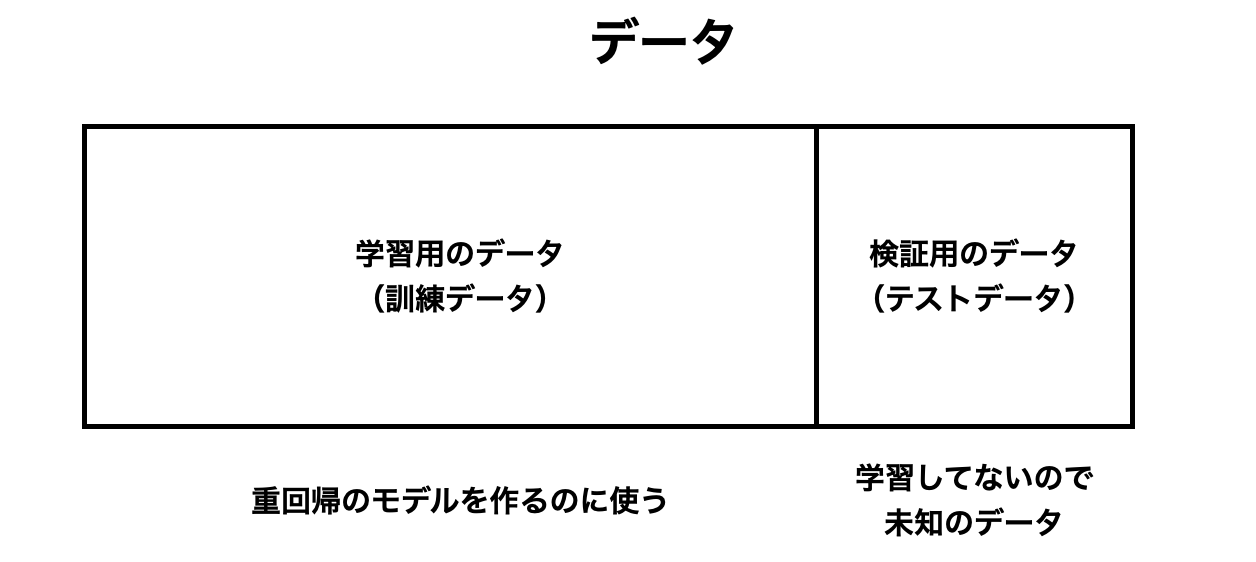

データの分割には train_test_split 関数を用います。

戻り値は、４つあります。最初から順番に、
1. 説明変数の訓練データ
2. 説明変数のテストデータ
3. 目的変数の訓練データ
4. 目的変数のテストデータ

となります。

今回の変数名は統一します。上から順番に
1. x_train
2. x_test
3. y_train
4. y_test

とします。

イメージとしては下記になります。


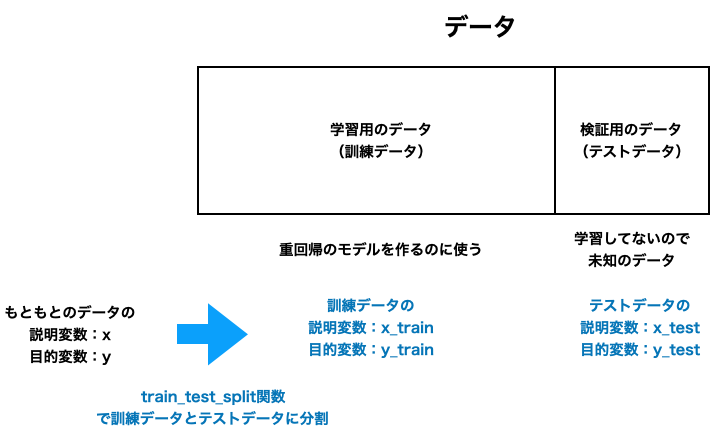

それでは、train_test_split 関数を使ってデータを分割してください。分割は訓練データを8割、テストデータを2割とします。random_stateは0とします。

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=0)

分割したデータ数をそれぞれ確認しましょう。まずは、訓練データを表示しましょう。

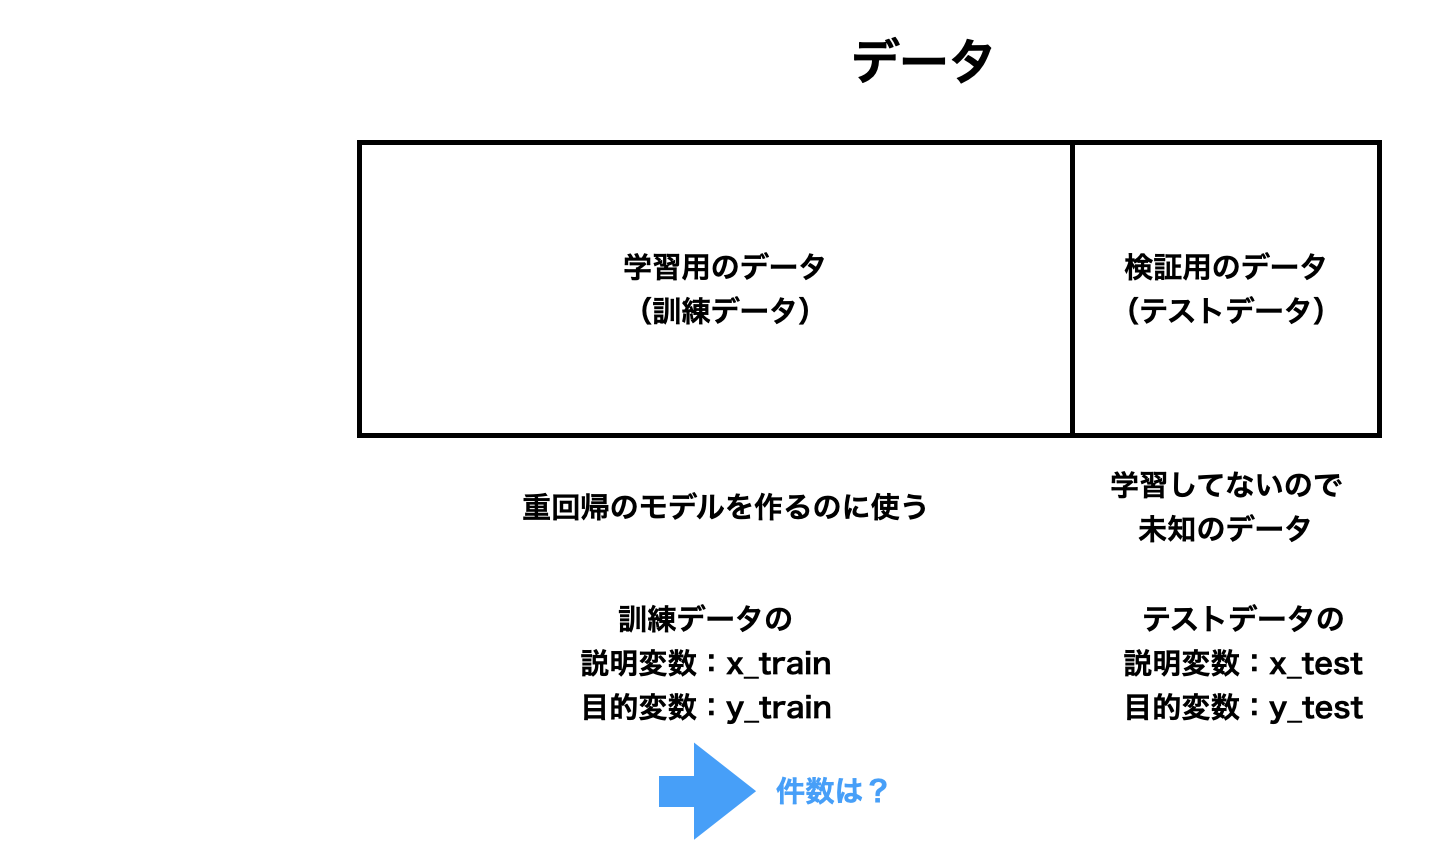

下記のセルに訓練データの件数をlen関数を用いて表示してください。

In [ ]:
print(len(x_train))

87


次に、テストデータの件数を表示しましょう

下記のセルにテストデータの件数をlen関数を用いて表示してください。

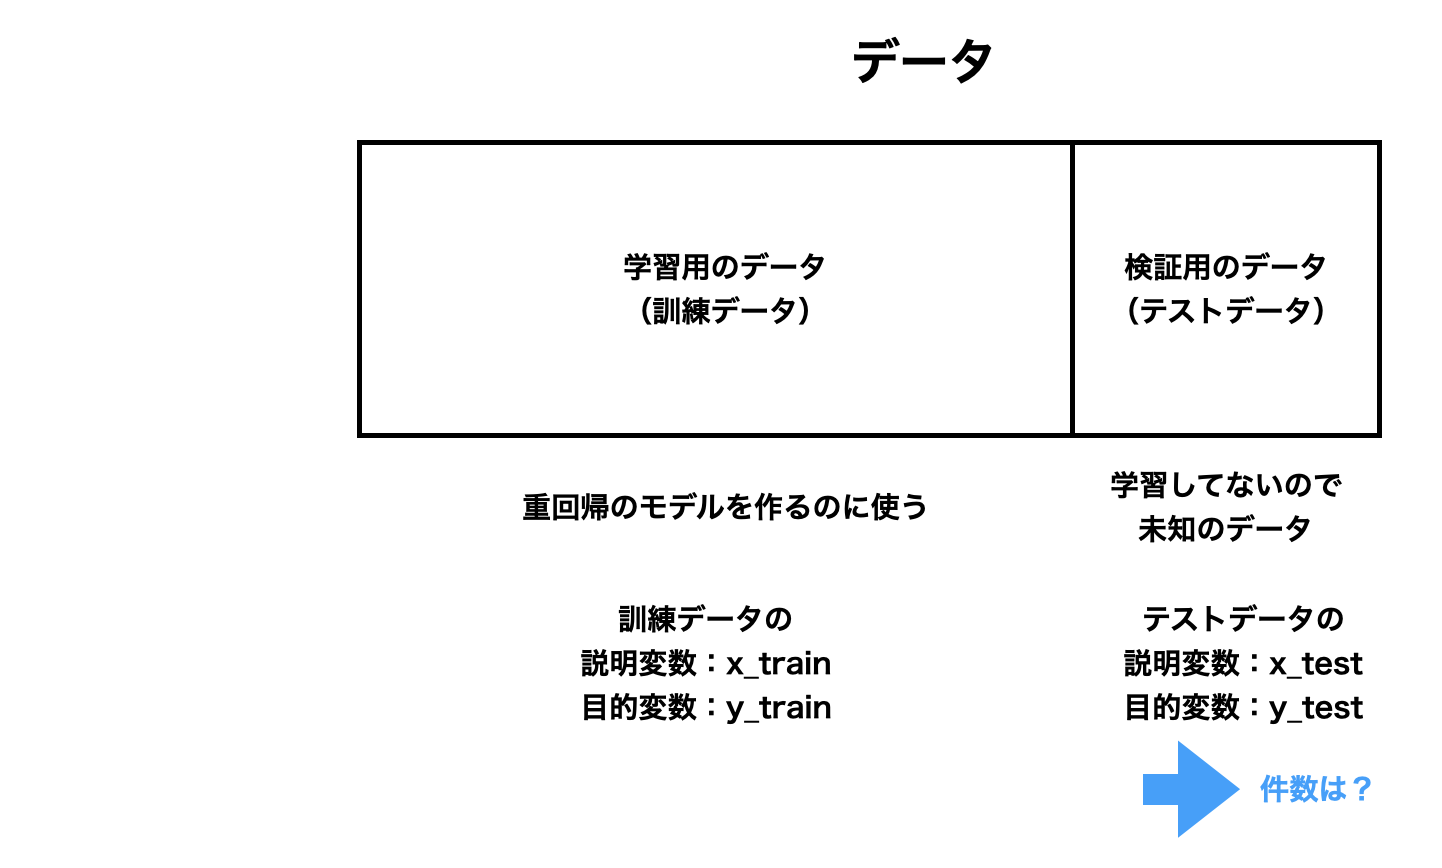

In [ ]:
print(len(x_test))

22


## 2-4 標準化

　それぞれの項目のデータの大きさがばらばらなので、データを標準化します。（各列の平均を０，分散を１とする）
　標準化は訓練データを使って定めます。

具体的には下記のデータを標準化しています。
 - 「前の日の体重」　previous
 - 「摂取したカロリー」　calory
 - 「お酒を飲んだ量」　drinking


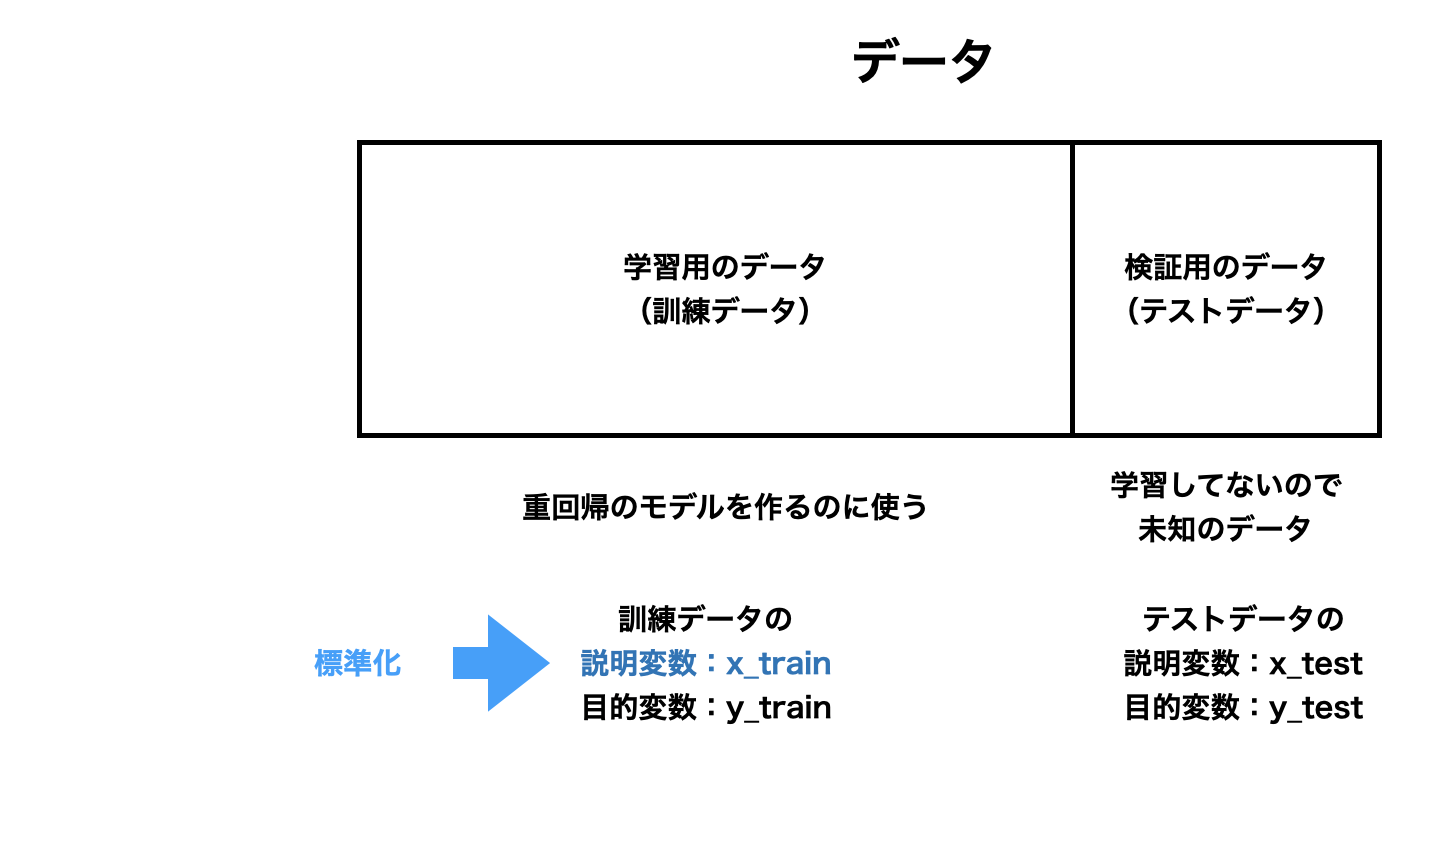

pythonで標準化を行うにはライブラリがあります。具体的には、preprocessing の StandardScaler を使います。fitメソッド、transformメソッドを使って標準化を行ってください。
標準化の方法を一部載せます。〜〜〜の部分を適切に置き換えてください。

標準化した値を表示してください。

: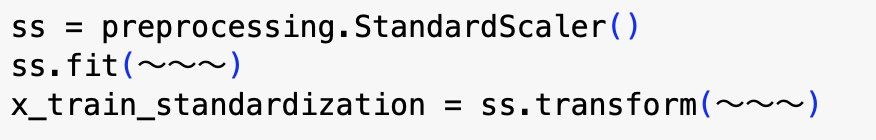

In [ ]:
ss=preprocessing.StandardScaler()
ss.fit(x_train)
x_train_stanardization=ss.transform(x_train)
print(x_train_stanardization)

[[-0.44990819 -0.91415897 -0.62961525]
 [ 0.79269538 -1.41815962  3.07876509]
 [-0.44990819  0.01995742  0.6983553 ]
 [-0.44990819  2.48190823  2.08052873]
 [ 0.1713936   0.8353302   0.46347615]
 [ 2.03529896 -0.91152022 -0.62961525]
 [-1.07120998  1.71139415 -0.62961525]
 [ 0.1713936  -0.15683862 -0.62961525]
 [-1.07120998 -0.66611676 -0.62961525]
 [-0.44990819 -0.04601125 -0.62961525]
 [-0.44990819  1.15725731  0.44089162]
 [ 0.79269538  0.64270168 -0.62961525]
 [-1.07120998  0.51868057 -0.62961525]
 [ 0.1713936  -0.58167686 -0.62961525]
 [-0.44990819  0.26272213  0.61705098]
 [-1.07120998  0.55562303  0.55381429]
 [-0.44990819 -0.55792814  0.62156789]
 [ 1.41399717  0.54770679 -0.62961525]
 [-0.44990819  0.00412494  0.58091573]
 [ 0.79269538 -1.80341666 -0.62961525]
 [ 2.65660075  0.64534042 -0.62961525]
 [-1.07120998  0.10703606 -0.62961525]
 [-1.07120998  0.63214669 -0.62961525]
 [ 2.03529896  2.48190823  2.08052873]
 [ 0.79269538  1.48710067  1.76434526]
 [-1.07120998  1.69028418

出力した値が３列あることが確認できます。出力の例を下記に載せます。

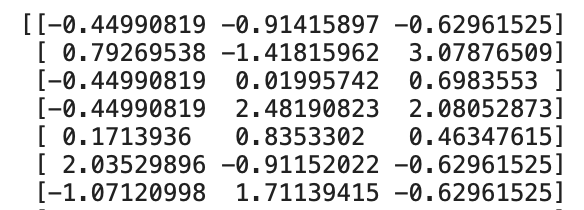

３列に表示されたデータは何でしょうか。１列目、２列目、３列目に表示されているデータが何であるかを「２−１データを表示」を振り返って答えてください。


１列目のデータは標準化された前日の体重のデータ

２列目のデータは標準化された摂取カロリーのデータ

３列目のデータは標準化された飲酒量のデータ

# 3 モデルの構築と評価

訓練データを使って重回帰のモデルを構築します。
重回帰のモデルの構築は前回学びました。復習になりますが、機械学習ライブラリ「scikit-learn」を利用する事により、「重回帰」を簡単に実装する事が出来ます。（scikit-learnの読み方はサイキットラーン）

それでは、説明変数と目的変数を設定して学習を実行しましょう。
$$
y_{体重} = \beta_0 + \beta_{前日の体重} x_{前日の体重} + \beta_{摂取カロリー} x_{摂取カロリー} + \beta_{飲酒量} x_{飲酒量}
$$

モデルの構築には訓練データを用います。訓練データの説明変数と目的変数を使って、fitメソッドで学習を実行してください。

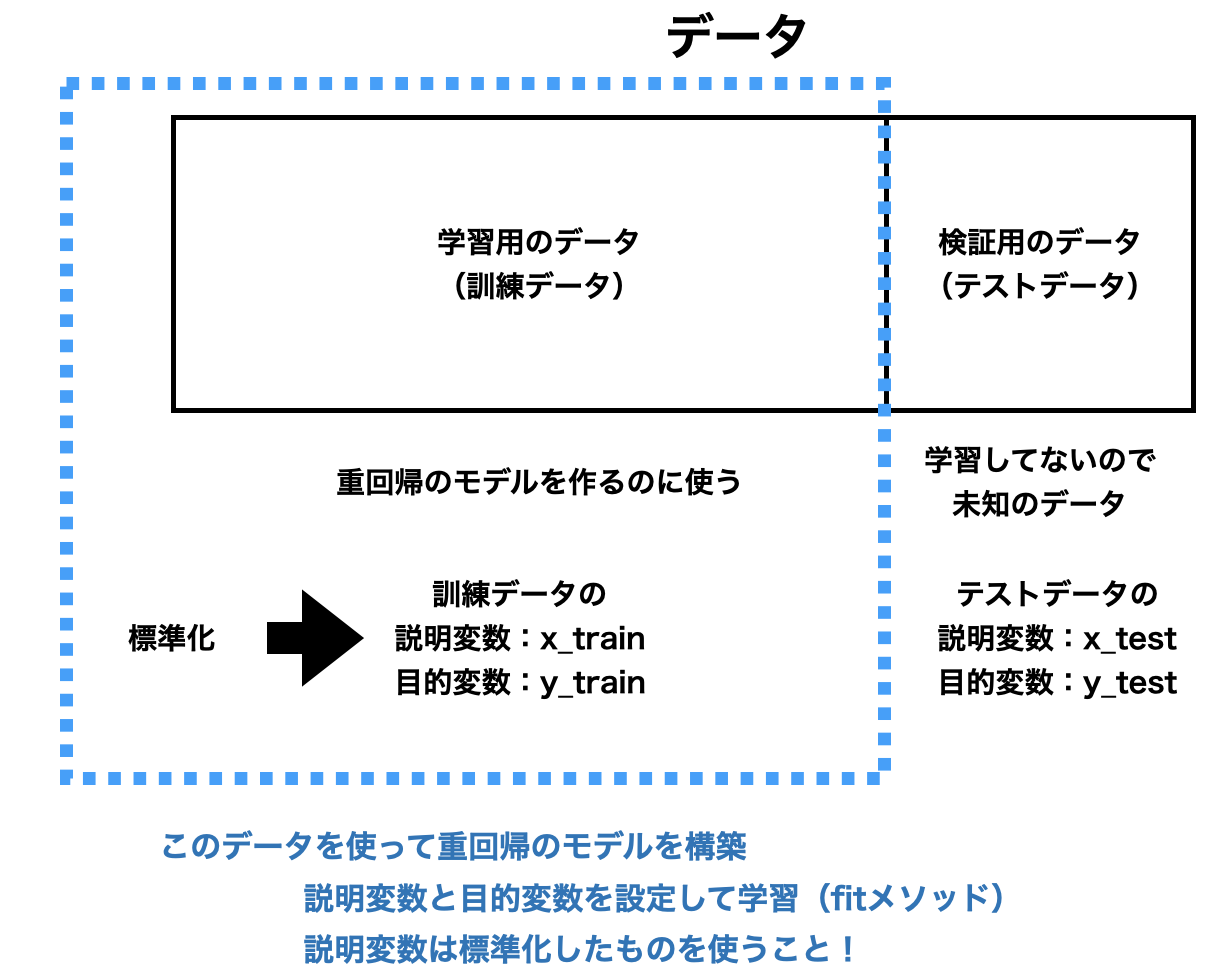

In [ ]:
y_1=LinearRegression()
y_1.fit(x_train_stanardization,y_train)
print(y_1.coef_)

[1.44109158 0.60774435 0.22160915]


以上で学習は完了です。

次に、学習結果の評価を行います。score メソッドを利用する事により決定係数を計算できます。

決定係数はデータに対する、推定されたモデルの当てはまりの良さ（度合い）を表し、$0$ から $1$ までの値をとります。$1$ に近いほど、当てはまりが良いです。

ここで、「決定係数はいくつ以上なら良いのか？」という疑問が生じますが、この問いに対する絶対的な回答は存在しません。

ここでは、参考として「$R^2 \geq 0.8$：精度良い」、「$R^2 \geq 0.5$：精度やや良い」、「$R^2 < 0.5$：精度良くない」という基準を紹介します（cf. https://istat.co.jp/ta_commentary/multiple_02 ）。

では、実際に訓練データに関する決定係数を計算してみましょう。

In [ ]:
print(y_1.score(x_train_stanardization,y_train))


0.854996832683825


　次に、未知のデータに対する当てはまりの良さを確認しましょう。未知のデータは学習に使っていないデータであるテストデータです。テストデータに関する決定係数を計算します。
ただし、標準化したデータを使っていますのでテストデータについても標準化を行います。訓練データと同等の変換を担保するために、訓練データで定めたものを使ってテストデータの標準化を行います。

　下記のセルではテストデータを標準化してください。訓練データを標準化するときに使ったss変数のtransformメソッドを使って標準化を行います。

In [ ]:
ss=preprocessing.StandardScaler()
ss.fit(x_test)
x_test_stanardization=ss.transform(x_test)
print(x_test_stanardization)

[[ 0.14524822  0.65181496 -0.52747522]
 [ 0.78434041 -0.7237349  -0.52747522]
 [-1.77202833  1.38235309 -0.52747522]
 [ 0.14524822 -0.12504999  0.18314663]
 [-1.13293614  2.01667401 -0.52747522]
 [ 0.14524822 -1.10147657 -0.52747522]
 [-0.49384396  0.10302046 -0.52747522]
 [ 0.14524822 -0.48141005 -0.52747522]
 [ 0.14524822 -1.52198144  1.32724782]
 [ 0.14524822 -0.7522437  -0.52747522]
 [ 0.78434041  1.01173862 -0.52747522]
 [-1.77202833  0.74803217  1.34146026]
 [ 2.70161696  0.46294412 -0.52747522]
 [-0.49384396  0.28120049  0.89376849]
 [-1.13293614 -1.40081902 -0.52747522]
 [ 1.42343259 -0.15355879 -0.52747522]
 [ 0.14524822 -0.81282491 -0.52747522]
 [-1.13293614  0.49145293 -0.52747522]
 [ 0.14524822 -1.51485424  1.31303539]
 [ 0.78434041 -0.89478773 -0.52747522]
 [ 0.14524822  0.9048306   3.38094499]
 [ 0.14524822  1.4286799  -0.52747522]]


　標準化したテストデータに対する決定係数を計算してみましょう。

In [ ]:
print(y_1.score(x_test_stanardization,y_test))

0.7243858327432172


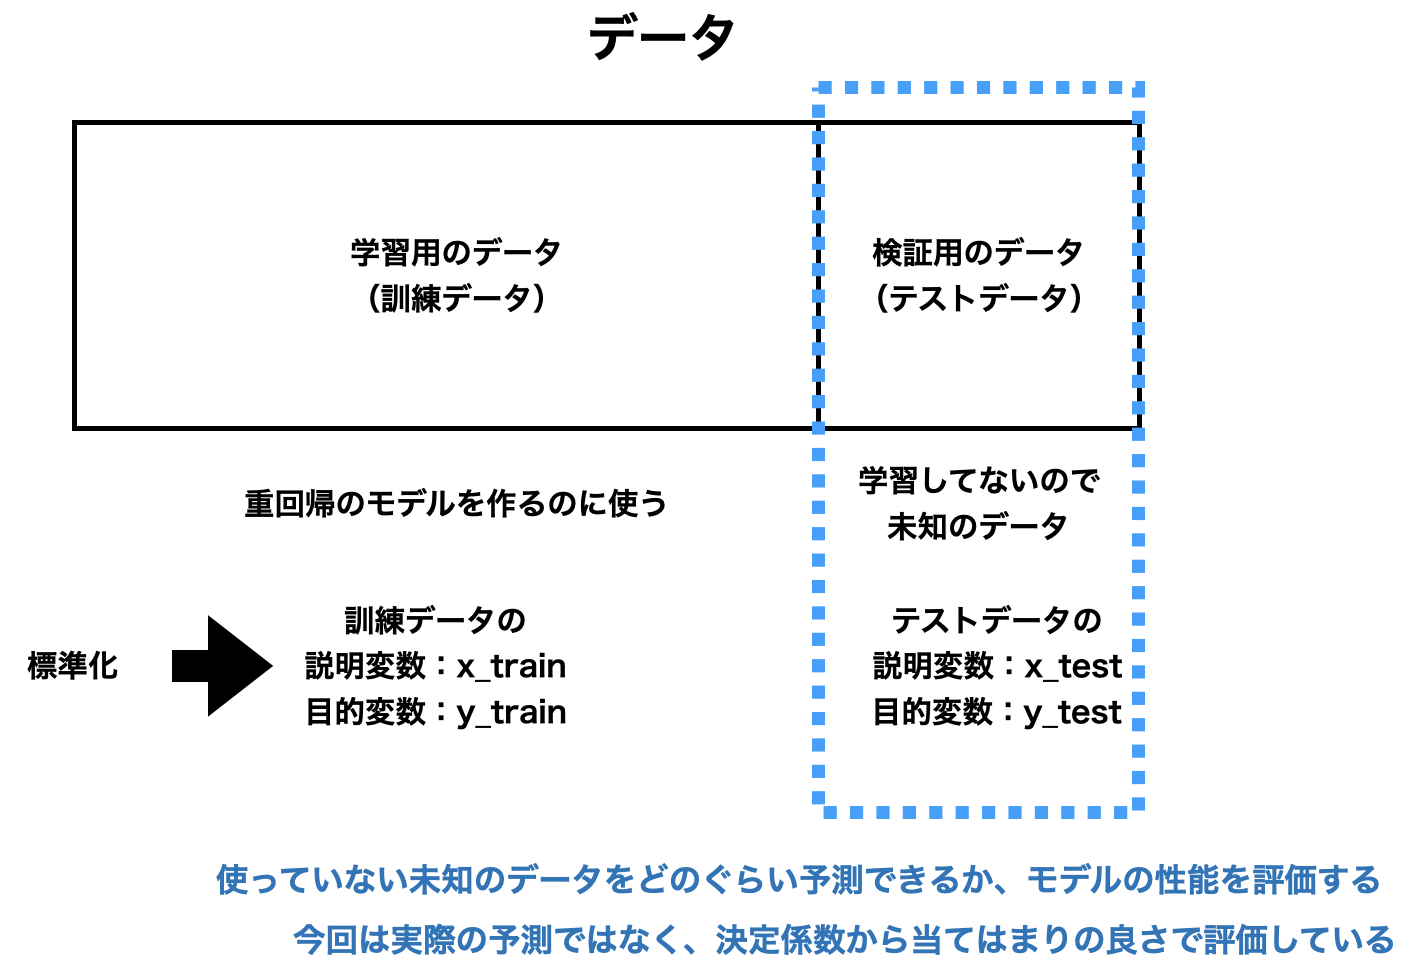

「訓練データに対する決定係数」と「テストデータに対する決定係数」を比較して、過学習について下記に述べなさい。

重回帰分析を行うときに使用した訓練データの決定係数は0.855と、精度が良い結果と判断できるが、テストデータの決定係数は、0.724と精度はやや良いという結果になった。これは、今回の訓練データの傾向に過度に沿った分析結果となってしまったことを示している。

また、偏回帰係数を確認しましょう。

In [ ]:
# 偏回帰係数
print(y_1.coef_)

[1.44109158 0.60774435 0.22160915]


In [ ]:
# 偏回帰係数（定数項、切片）
print(y_1.intercept_,y_1.coef_)

51.89655172413793 [1.44109158 0.60774435 0.22160915]


求めた偏回帰係数から重回帰のモデル式を見ましょう。
$$
y_{体重} = \beta_0 + \beta_{前日の体重} x_{前日の体重} + \beta_{摂取カロリー} x_{摂取カロリー} + \beta_{飲酒量} x_{飲酒量}
$$

前日の体重の偏回帰係数（$\beta_{前日の体重}$）の値は（１）である。

摂取カロリーの偏回帰係数（$\beta_{摂取カロリー}$）の値は（２）である。

飲酒量の偏回帰係数（$\beta_{飲酒量}$）の値は（３）である。

$\beta_{0}$の値は（４）である。

（１）〜（４）の値を下記のセルに記述してください。

また、標準化した偏回帰係数は比較ができるので、目的変数に対する各説明変数の影響度合いについて考察を記述してください。

(1)1.441

(2)0.608

(3)0.222

(4)51.897

前日の体重が最も体重に与える影響が強く、飲酒量はあまり大きな影響はないと推測される。一方で、摂取カロリーについては、やや影響が強いと言える。